In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
class SimpleNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = X.groupby(y).mean() if isinstance(X, pd.DataFrame) else {c: X[y==c].mean(axis=0) for c in self.classes}
        self.vars = {c: X[y==c].var(axis=0) for c in self.classes}
        self.priors = {c: np.mean(y==c) for c in self.classes}
        
    def gaussian(self, x, mean, var):
        return np.exp(-(x-mean)**2 / (2*var)) / np.sqrt(2*np.pi*var)
    
    def predict(self, X):
        preds = []
        for row in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                likelihood = np.sum(np.log(self.gaussian(row, self.means[c], self.vars[c])))
                posteriors.append(prior + likelihood)
            preds.append(self.classes[np.argmax(posteriors)])
        return np.array(preds)

In [4]:
custom_nb = SimpleNaiveBayes()
custom_nb.fit(X_train, y_train)
y_pred_custom = custom_nb.predict(X_test)

In [5]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_builtin = gnb.predict(X_test)

In [6]:
def evaluate(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="macro")
    rec = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f"\n{title}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Custom Naive Bayes
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000


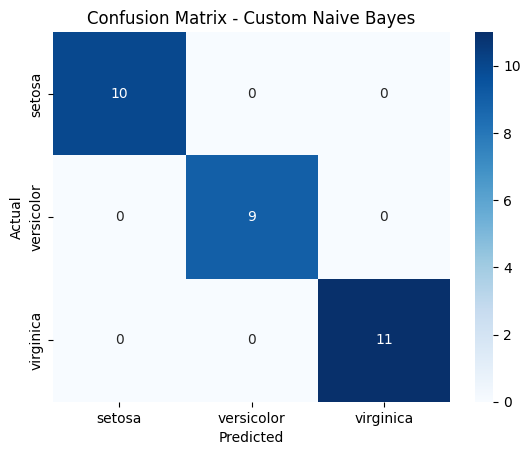


Built-in Naive Bayes
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000


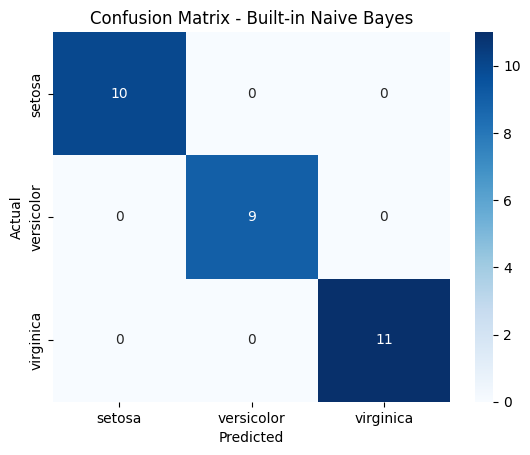

In [7]:
evaluate(y_test, y_pred_custom, "Custom Naive Bayes")
evaluate(y_test, y_pred_builtin, "Built-in Naive Bayes")